## Title: Hospital Stay Prediction
Introduction:

Healthcare organizations are under increasing pressure to improve patient care outcomes and achieve better care. While this situation represents a challenge, it also offers organizations an opportunity to dramatically improve the quality of care by leveraging more value and insights from their data. Health care analytics refers to the analysis of data using quantitative and qualitative techniques to explore trends and patterns in the acquired data. While healthcare management uses various metrics for performance, a patient’s length of stay is an important one.

Being able to predict the length of stay (LOS) allows hospitals to optimize their treatment plans to reduce LOS, to reduce infection rates among patients, staff, and visitors.

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## Business Case :The goal of this project is to accurately predict the Length of Stay for each patient so that the hospitals can optimize resources and function better.
### Multiclass Classification


In [2]:
## Reading the dataset
data=pd.read_csv('HealthCareAnalytics.csv')
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


## Basic Checks

In [3]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,Nov-20,4752,0-10


In [5]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [7]:
data.describe(include='O')

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
# Number of distinct observations in  dataset 
for i in data.columns:
    print(i, ':', data[i].nunique())

case_id : 318438
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available_Extra_Rooms_in_Hospital : 18
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed_Grade : 4
patientid : 92017
City_Code_Patient : 37
Type_of_Admission : 3
Severity_of_Illness : 3
Visitors_with_Patient : 28
Age : 10
Admission_Deposit : 7300
Stay : 11


## Basic Understanding of Feature --> Domain Analysis

Input Variables:
### Hospital-Level Data:

1.case_id : this is an unique Identification for every patient who has been admitted in hospital.(numeric,discrete type variable)

2.Hospital_code: Every Hospital has their own Hospital_code, in this dataset it is ranging from 1 to 32.(numeric, discrete type variable).

3.Hospital_type_code:Every Hospital has some Hospital_type_code ranging from 'a' to 'g'.(object type variable).

4.City_Code_Hospital:Every Hospital belongs to a particular city, and that has a code.there are unique 13 City_Code_hospital(1,2,3,4,5,6,7,8,9,10,11,12,13)(numeric discrete variable).

5.Hospital_region_code:At what region the perticular hospital is located in a city.Here is three type of Hospital_region_code i.e. X,Y,Z.(object type variable).

6.Available_Extra_Rooms_in_Hospital:How many Extra rooms are availabe in a particular hospital for patients.(numeric, discrete variable).

7.Department:A particular patient belongs to which department of hospital like(gynecology,anesthesia,radiotherapy,
TB & Chest disease,surgery).(object type variable).

8.Ward_Type: There are 6 type of unique ward in each hospital(P,Q,R,S,T,U).(object type variable).

9.Ward_Facility_Code:For each hopital in each ward there are different type of facilities available,there are 6 unique type Ward facility code is there(A,B,C,D,E,F)(OBJECT TYPE VARIABLE).

10.Bed_Grade:Hospital beds are having some grades, they are denoted like 1.0,2.0,3.0,4.0(numeric variable).

### Patient-Level Data:

11.patientid:Every patient in a particular hospital is uniquely registered by some patientid, this is an unique feature.(discrete numeric feature).

12.City_Code_Patient:A patient belongs to some particular city, and that city must have some city_code.(1.0 to 38.0)(numeric variable).

13.Type_of_Admission:What type of Admission has done for a particular patient(Trauma,Emergency,Urgent)(object type variable).

14.Severity_of_Illness:Severity of illness (SOI) is defined as the extent of organ system derangement or physiologic decompensation for a patient. It denotes a medical classification as either minor, moderate or extreme. The SOI classification is meant to provide a basis for evaluating hospital resource use or to establish patient care guidelines.

15.Visitors_with_Patient:Number of visitors visit to see a particular patient who has been admitted to stay in hospital throughout the tenure of his/her treatment.(numeric discrete variable).

16.Age:A particular patient is belonging to what age group. In this dataset we have 10 different age group
(41-50
31-40
51-60
21-30
71-80
61-70
Nov-20
81-90
0-10
91-100).(ordinal variable,object type)

17..Admission_Deposit:A certain amount of money have to deposit during admission of a patient in a hospital.(discrete numeric variable)


Output Variable/Target Variable

18.Stay:Using the features given need to predict if a patients comes to hospital than for how many days he/she can stay (has 11 unique class or group)

## Exploratory Data Analysis

### Univariate Analysis--> Analysing Single variable one at a time

In [9]:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis -- Analyzing 2 variables at a time

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [3]:
data1=data[['case_id','Hospital_code','City_Code_Hospital','Available_Extra_Rooms_in_Hospital',
           'Bed_Grade','patientid','City_Code_Patient','Visitors_with_Patient','Admission_Deposit']]

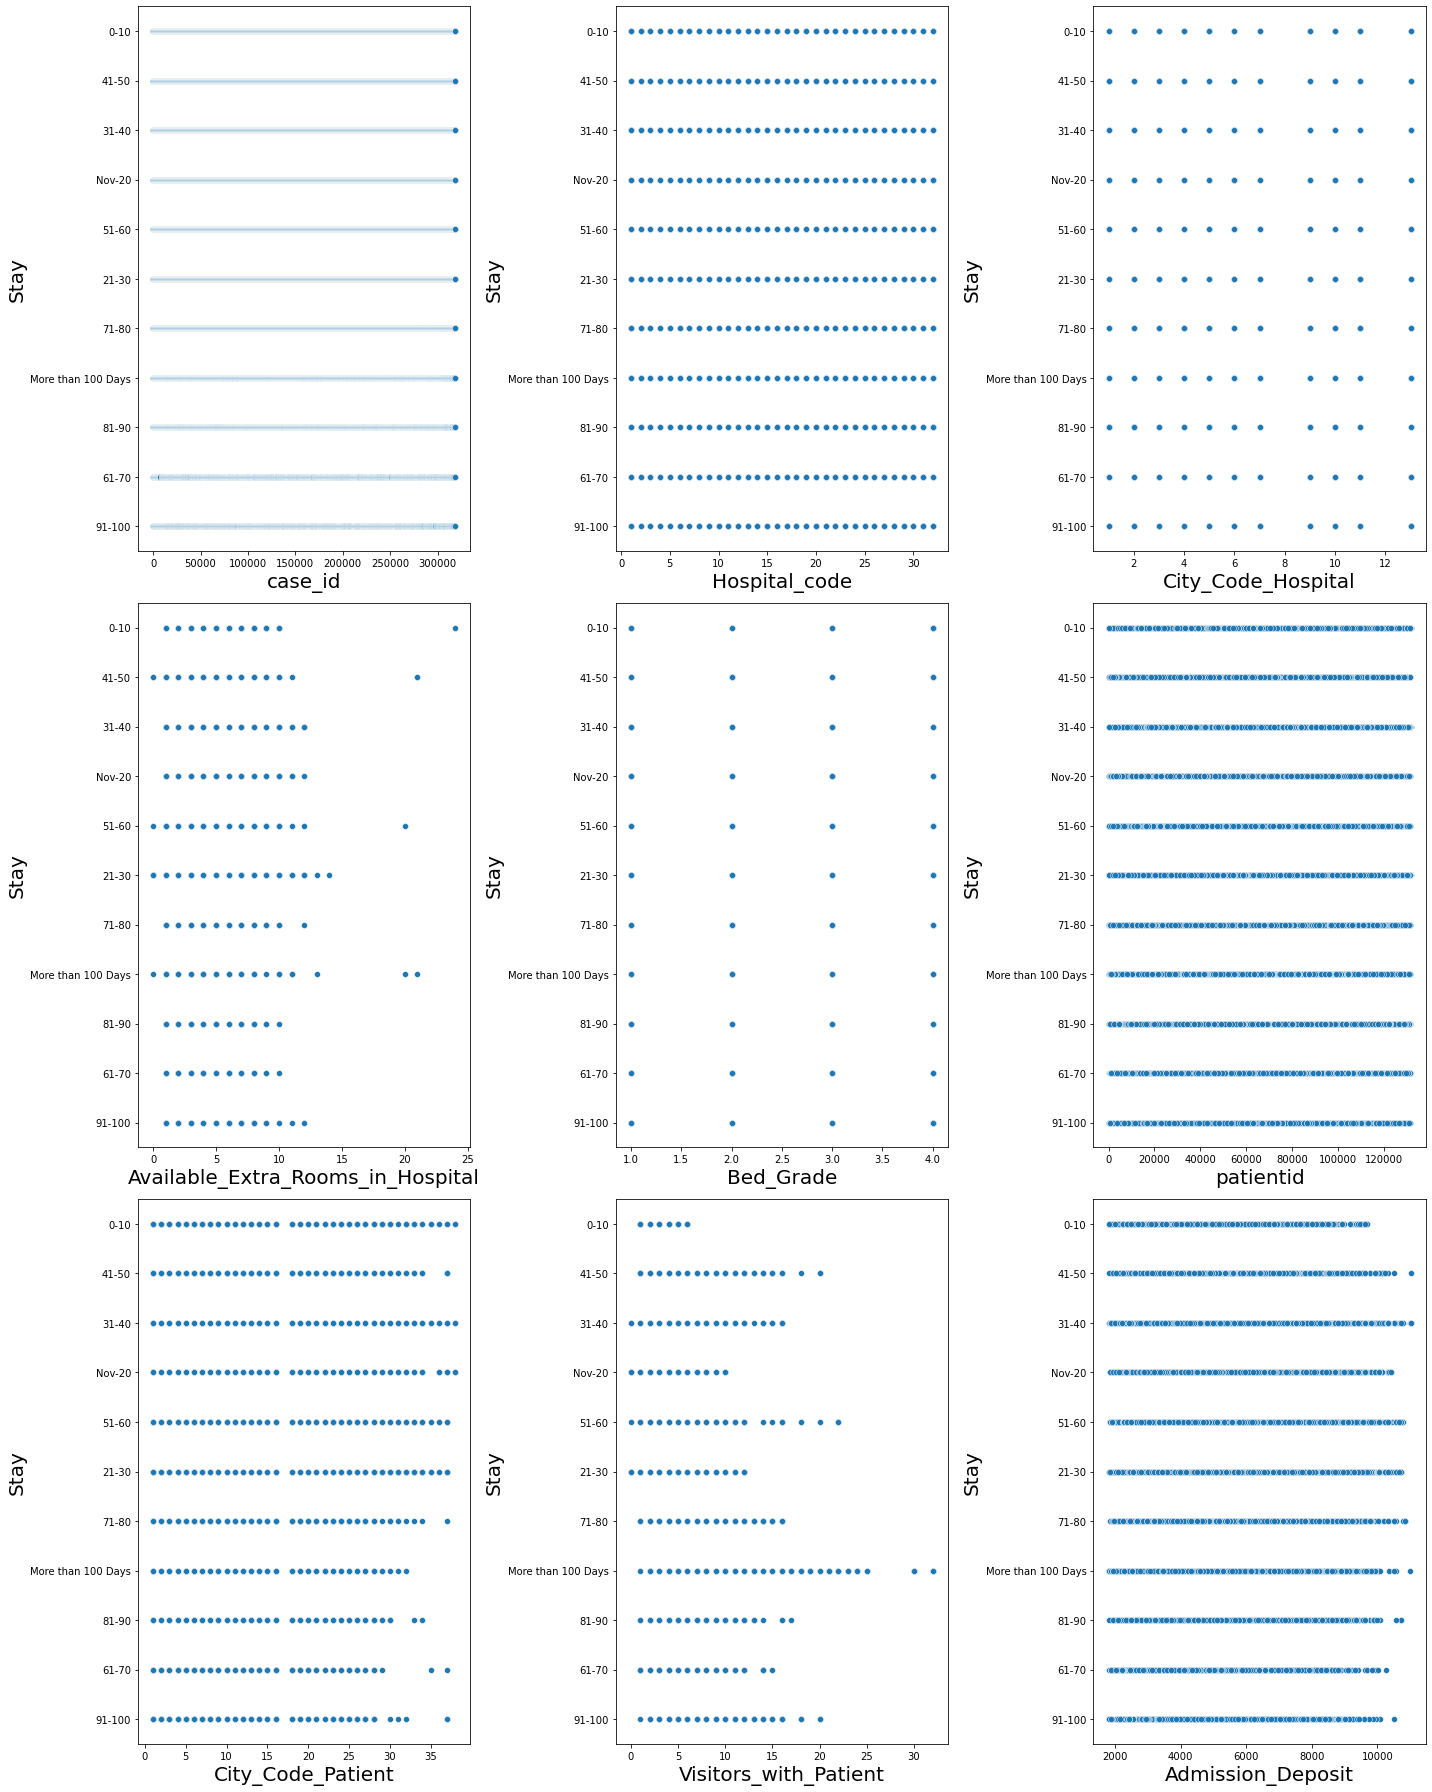

In [4]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=9 :  ## As there is 9 columns in the data1
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=data.Stay)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Stay',fontsize=20)
    plotnumber+=1
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

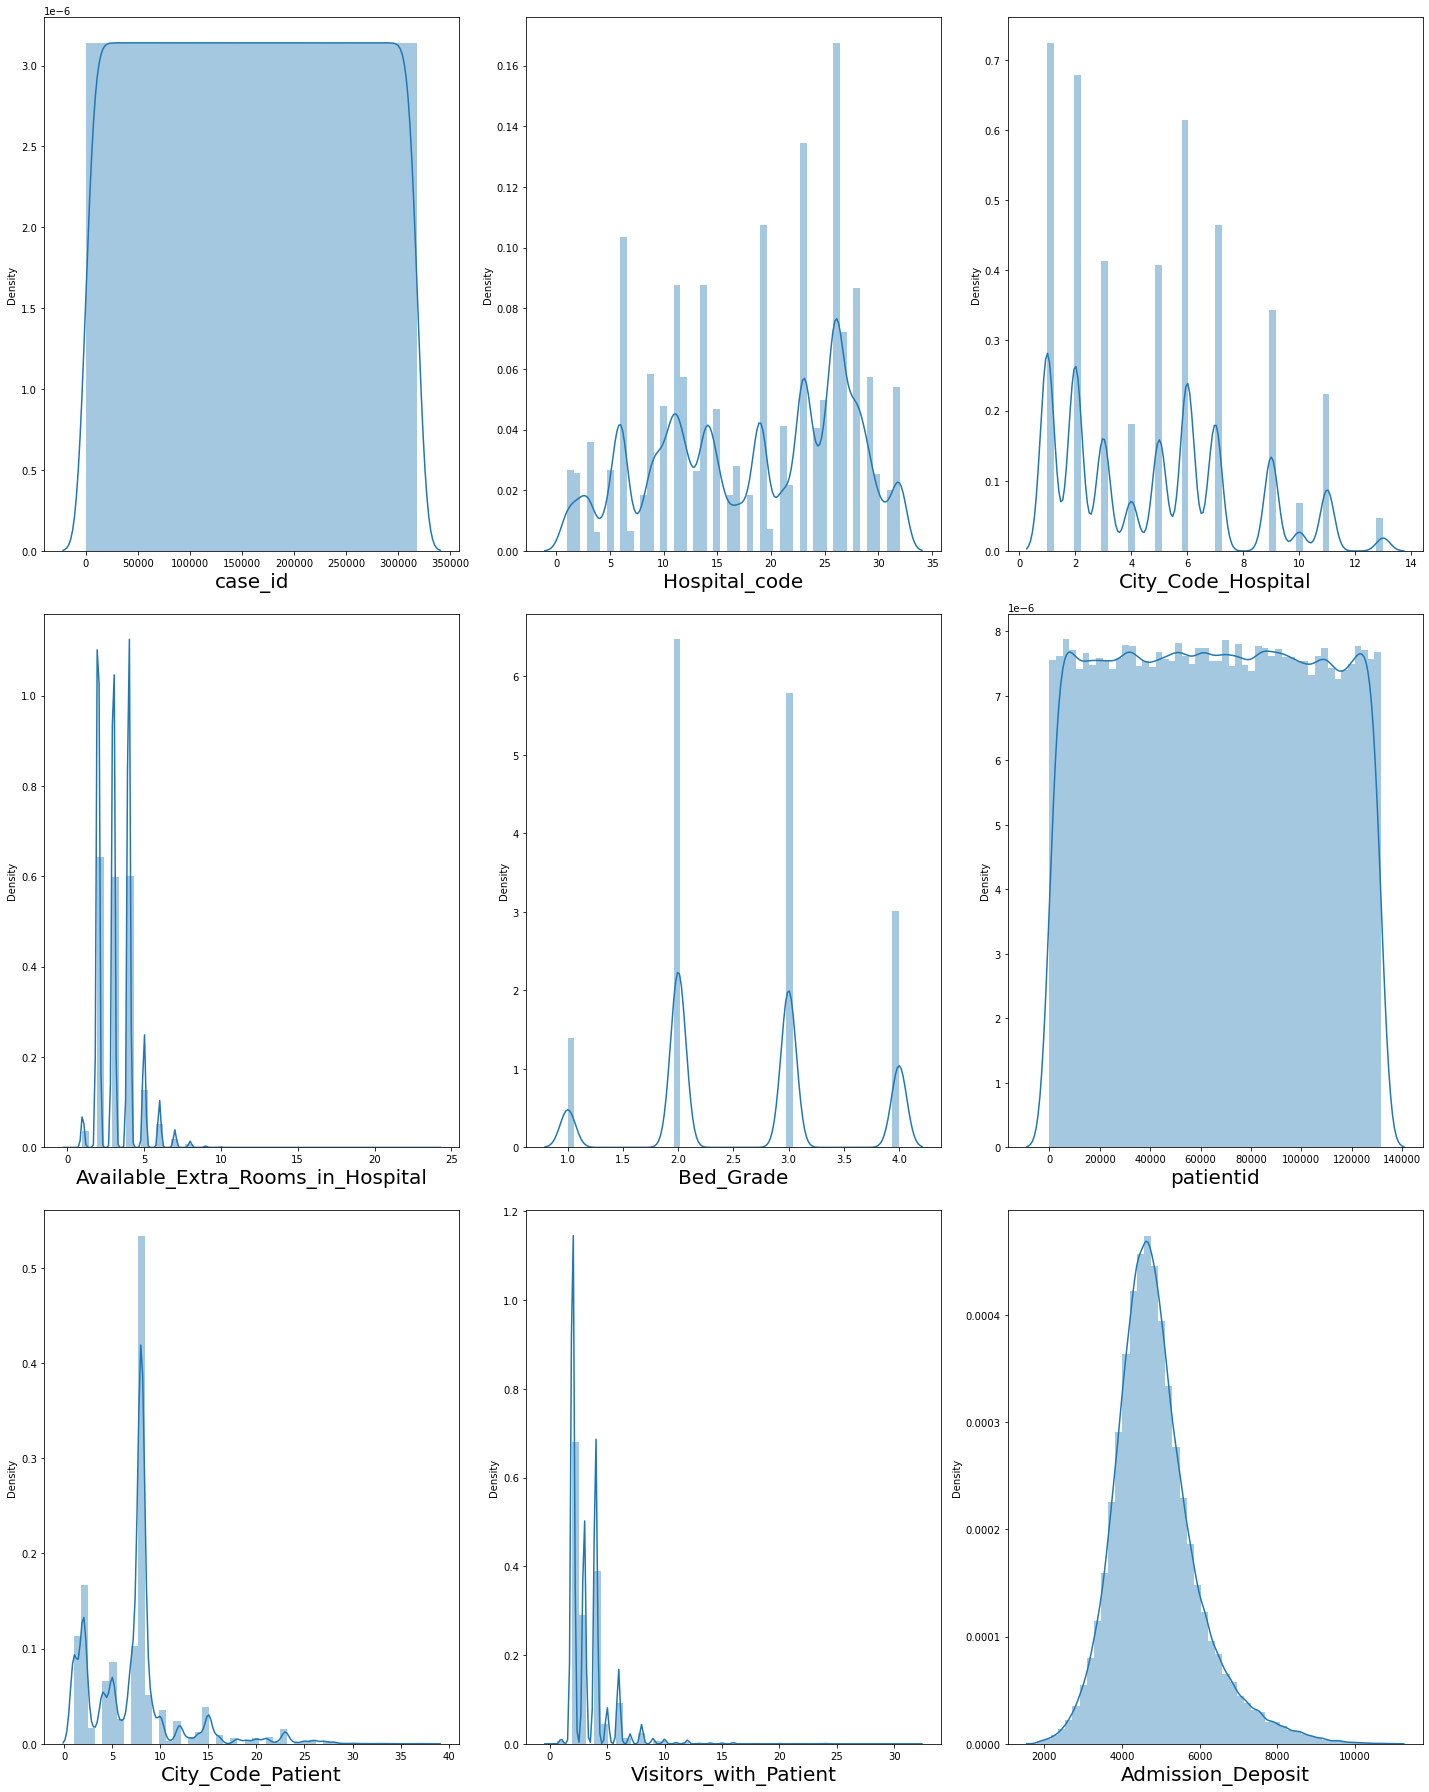

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=9 :  ## As there is 9 columns in the data1
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x=data1[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

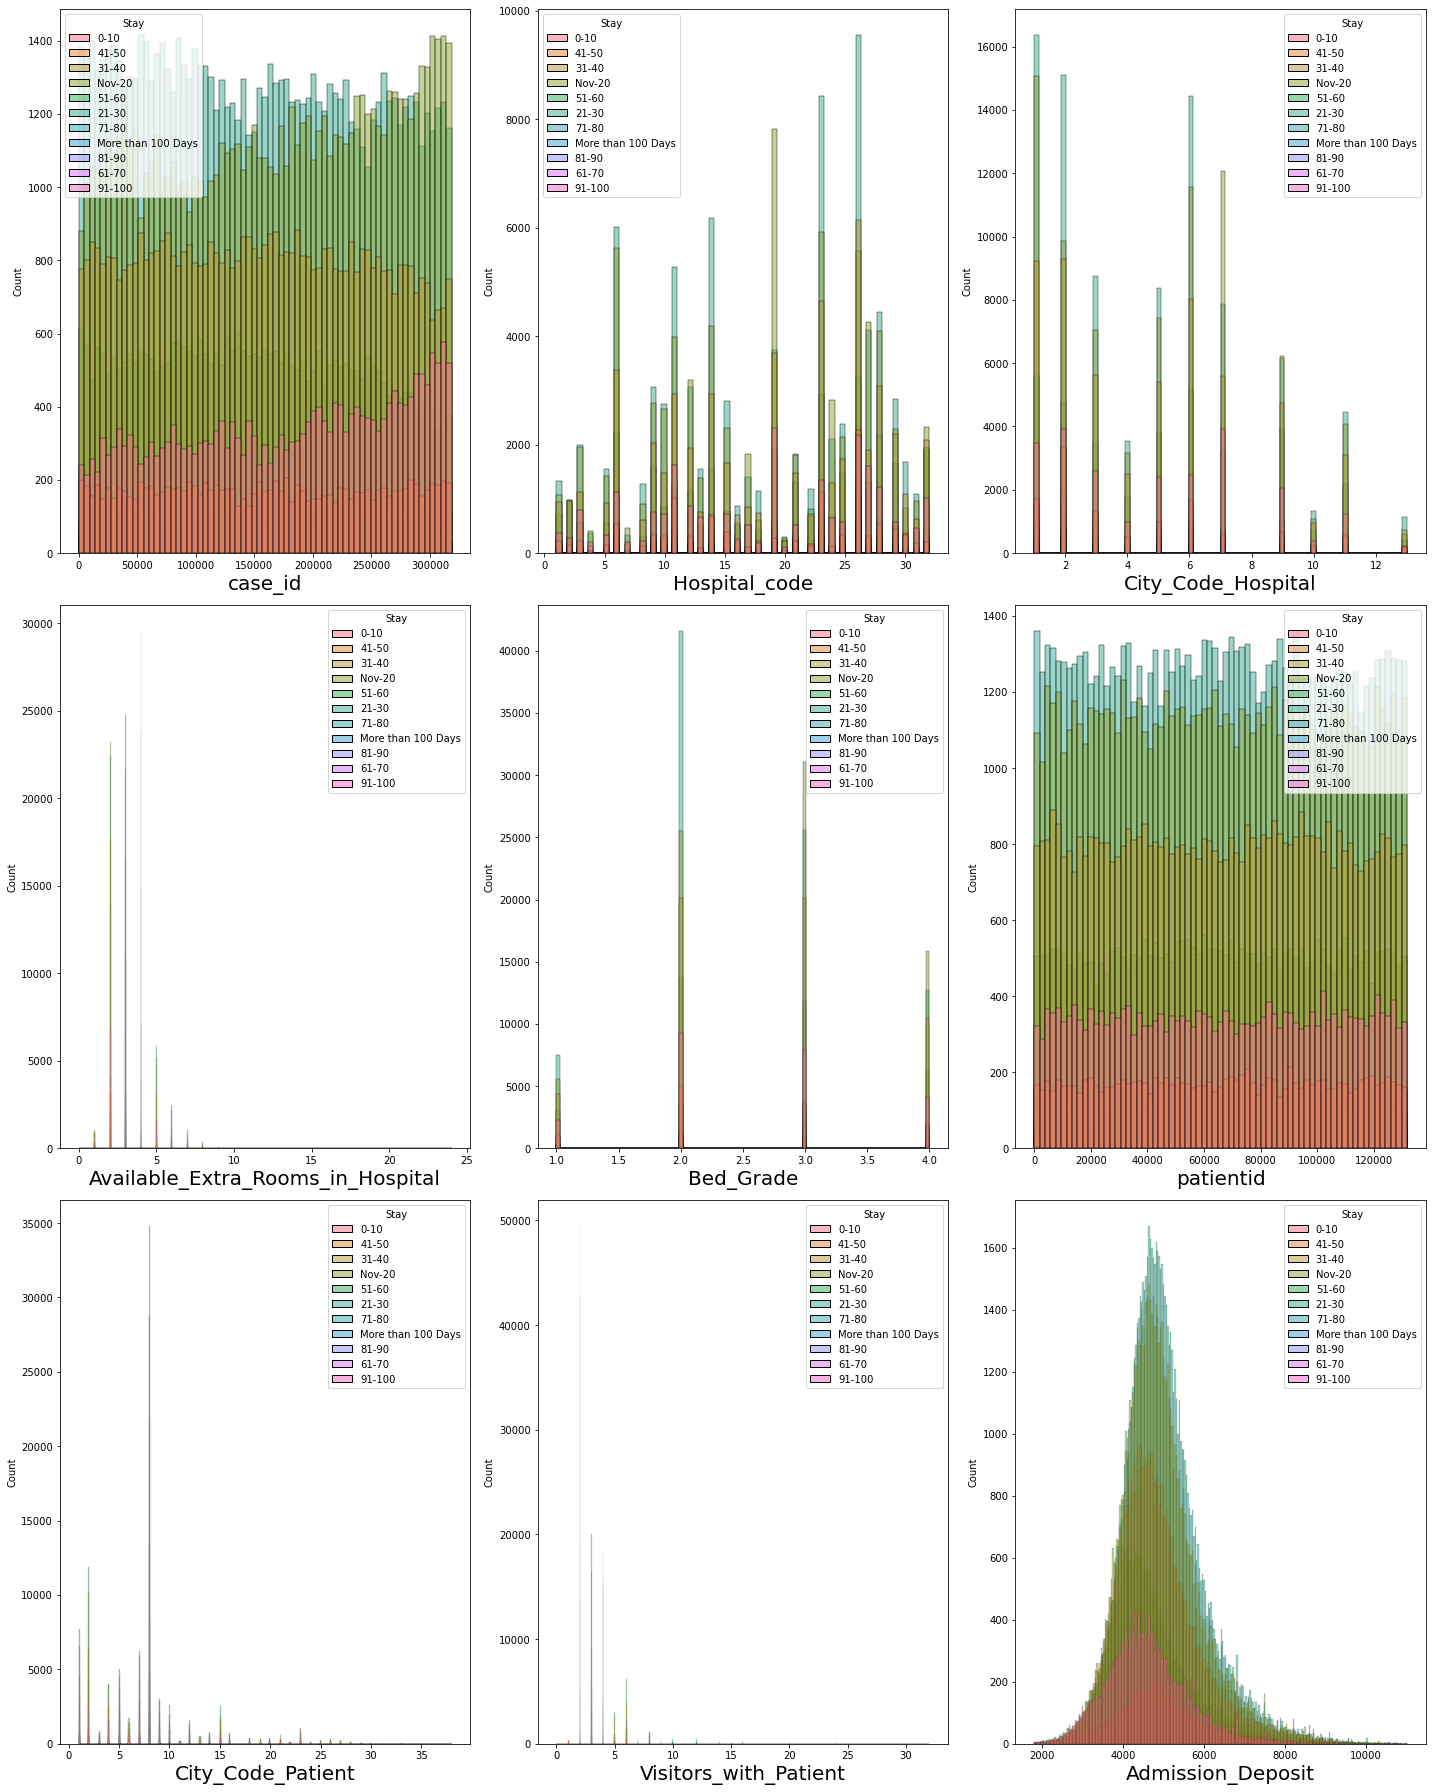

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=9 :  ## As there is 9 columns in the data1
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data1[column].dropna(axis=0),hue=data.Stay)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Categorical Features Distributions

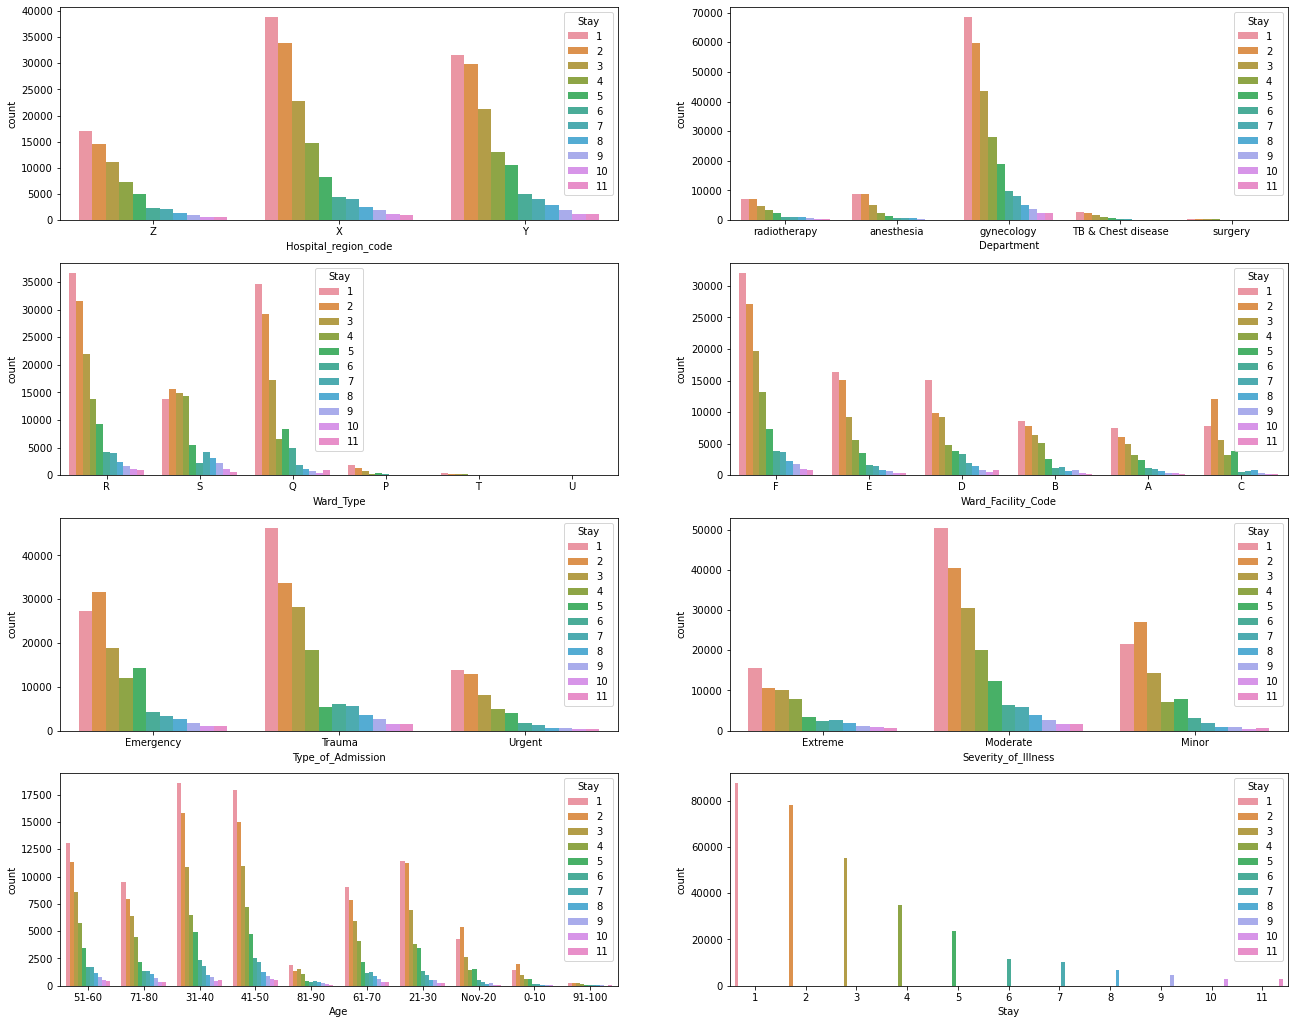

In [6]:
categorical = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
               'Type_of_Admission','Severity_of_Illness', 'Age', 'Stay']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(22, 18))
for col, ax in zip(categorical[1:], axs.ravel()):
    sns.countplot(x=col,data=data, ax=ax,hue=data.Stay)

In [5]:
data.Stay=data.Stay.map({'21-30':1,'Nov-20':2,'31-40':3,'51-60':4,'0-10':5,'41-50':6,
                         '71-80':7,'More than 100 Days':8,'81-90':9,'91-100':10,'61-70':11})

<AxesSubplot:xlabel='Age', ylabel='count'>

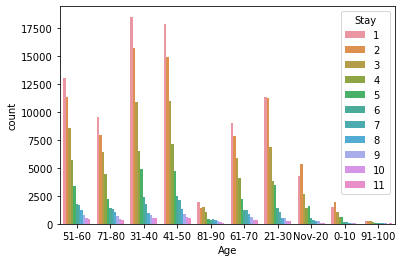

In [36]:
sns.countplot(x=data.Age,hue=data.Stay,data=data)

## Insights from Categorical Feature Analysis
Hospital_region_code: From the above graph we can see that there are 3 types of region code is there i.e. X,Y,Z. among them X has more patient count and Z has least patients among them.Length of stay of range 21-30 days in X,Y,Z Hospital_region_code is  more than any other stay class.

Department: Gynecology department has most of the patients and Surgery Department has least number of patients.from the graph we can say that Length of stay of range 21-30 days is highest in Gynecology department.

Ward_Type:Most of the patients likes to stay at R type Ward. T type of Ward has least amount of patients.we can say that Length of stay of range 21-30 days is highest in R and Q type of ward.

Ward_Facility_Code: most of the patients likes those Ward to stay which have Ward_Facility_Code of F and all other Ward_Facility_Code like A,B,C,D,E have almost same amount of patients.we can say that Length of stay of range 21-30 days is highest for almost all Ward_Facility_Code.

Type_of_Admission: Most of the Patients who are having Trauma are more in numbers,Emergency patients are between range of 0 to 110000, Urgent Patients are between range of 0 to 50000.we can say that Length of stay of range 21-30 days is highest for almost all Type_of_Admission.

Severity_of_Illness:most of the patients are having  Moderate Severity_of_Illness, and 0 to 50000 patients are having Extreme Severity_of_Illness and 0 to 80000 patients are having Minor Severity_of_Illness.here also we can say that Length of stay of range 21-30 days is highest for almost all Severity_of_Illness.

Age: Most of the patients are in range of Age of 31 to 50.we can say that Length of stay of range 21-30 days is highest for almost all Age groups.

Stay:Most of the patients are staying in hospital for 21-30 days range.very less amount of patients stays for 61-70 days,71-80 days ,81-90 days,91-100 days and more than 100 days of range.

## Insights From Bivariate Analysis
case_id:this is an unique feature id for every case registered in hospital. so, we can say that it has no relationship with target variable.

Hospital_code: this feature is ranging from 1 to 38.from the graph(histplot) we can say that Length of stay of range 21-30 days is highest for almost all Hospital_code.

City_Code_Hospital: This feature has distict 13 values or we can say this dataset has 13 City_Code_Hospital, we can say that Length of stay of range 21-30 days is highest for almost all City_Code_Hospital.City_Code_Hospital 1 has most number of patients.

Available_Extra_rooms_in_Hospital:This feature tells us How many Extra rooms are availabe in a particular hospital for patients.Most of the hospitals are having 2 extra rooms in hospital.

Bed_Grade:Most of the patients choose Bed_Grade 2,we can say that Length of stay of range 21-30 days is highest for Bed_Grade 2.

patientid:This is an unique feature for every patient. It has no relation with target variable.

City_Code_Patient: Patients from City_Code_Patient 8.0 are maximum.we can say that Length of stay of range 21-30 days is highest for almost  all City_Code_Patient.

Visitors_With_Patients: maximum patients have 2 visitors for them.from the scatterplot we can say that those patients who are staying  More than 100 days have more visitors than those patients who are staying at hospital for less time.

Admission_Deposit:From distplot we can say that Admission_Deposit is ranging from 2000 to 10000.Most of the patients have Admission_Deposit of 4000 to 6000.from histplot we can say that Length of stay of range 21-30 days for most of the patients who have Admission_Deposit of 4000 to 6000.


Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

In [9]:
data.loc[data.Stay==1]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
10,11,22,g,9,Y,2,radiotherapy,S,B,2.0,31397,7.0,Urgent,Extreme,2,51-60,5797,1
13,14,9,d,5,Z,3,radiotherapy,S,F,3.0,31397,7.0,Urgent,Extreme,2,51-60,8477,1
18,19,32,f,9,Y,4,radiotherapy,S,B,2.0,63418,8.0,Trauma,Extreme,2,71-80,7442,1
21,22,3,c,3,Z,2,anesthesia,R,A,3.0,63418,8.0,Trauma,Extreme,2,71-80,6672,1
23,24,6,a,6,X,3,anesthesia,R,F,3.0,63418,8.0,Urgent,Extreme,2,71-80,4664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318402,318403,28,b,11,X,4,gynecology,R,F,4.0,74794,1.0,Emergency,Minor,6,21-30,2088,1
318409,318410,30,c,3,Z,2,surgery,R,A,4.0,102826,7.0,Emergency,Moderate,3,41-50,8937,1
318417,318418,15,c,5,Z,4,gynecology,Q,F,4.0,104580,4.0,Urgent,Minor,2,21-30,4819,1
318430,318431,6,a,6,X,3,anesthesia,Q,F,4.0,109796,8.0,Trauma,Moderate,2,41-50,5065,1


## Data Preprocessing

In [8]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [20]:
## Imputing the missing values 
## Bed_Grade and City_Code_Patient are having missing values
## Bed_Grade is normally distributed data So Median will be better substitute to impute missing values.
##City_Code_Patient is Object type of data so Mode will be better substitute to impute missing values.

In [6]:
## Impuation using inbuild method fillna.
data['City_Code_Patient'] = data['City_Code_Patient'].fillna(data['City_Code_Patient'].mode()[0])

data['Bed_Grade'] = data['Bed_Grade'].fillna(data['Bed_Grade'].median())

In [11]:
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [24]:
## There are categorical data need to convert them into numerical

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   case_id                            318438 non-null  int64
 1   Hospital_code                      318438 non-null  int64
 2   Hospital_type_code                 318438 non-null  int64
 3   City_Code_Hospital                 318438 non-null  int64
 4   Hospital_region_code               318438 non-null  int64
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64
 6   Department                         318438 non-null  int64
 7   Ward_Type                          318438 non-null  int32
 8   Ward_Facility_Code                 318438 non-null  int32
 9   Bed_Grade                          318438 non-null  int32
 10  patientid                          318438 non-null  int64
 11  City_Code_Patient                  318438 non-null  int32
 12  Ty

In [7]:
##Conversion of datatype
data.Bed_Grade=data.Bed_Grade.astype('int')
data.City_Code_Patient=data.City_Code_Patient.astype('int')

In [26]:
data.Hospital_type_code.value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [8]:
data.Hospital_type_code=data.Hospital_type_code.map({'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7})

In [28]:
data.Hospital_type_code.value_counts()

1    143425
2     68946
3     45928
5     24770
4     20389
6     10703
7      4277
Name: Hospital_type_code, dtype: int64

In [30]:
data.Hospital_region_code.value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [9]:
data.Hospital_region_code=data.Hospital_region_code.map({'X':1,'Y':2,'Z':3})

In [33]:
data.Department.value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [10]:
data.Department=data.Department.map({'gynecology':1,'anesthesia':2,'radiotherapy':3,'TB & Chest disease':4,'surgery':5})

In [37]:
data.Ward_Type.value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [11]:
## Converting the numerical equivalent
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Ward_Type']=le.fit_transform(data['Ward_Type'])

In [40]:
data.Ward_Facility_Code.value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Ward_Facility_Code']=le.fit_transform(data['Ward_Facility_Code'])

In [14]:
data.Type_of_Admission.value_counts()

1    152261
2    117676
3     48501
Name: Type_of_Admission, dtype: int64

In [13]:
data.Type_of_Admission=data.Type_of_Admission.map({'Trauma':1,'Emergency':2,'Urgent':3})

In [49]:
data.Severity_of_Illness.value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity_of_Illness, dtype: int64

In [15]:
data.Severity_of_Illness=data.Severity_of_Illness.map({'Moderate':1,'Minor':2,'Extreme':3})

In [52]:
data.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [55]:
data.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
Nov-20    16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [16]:
data.Age=data.Age.map({'41-50':1,'31-40':2,'51-60':3,'21-30':4,'71-80':5,'61-70':6,'Nov-20':7,'81-90':8,'0-10':9,'91-100':10})

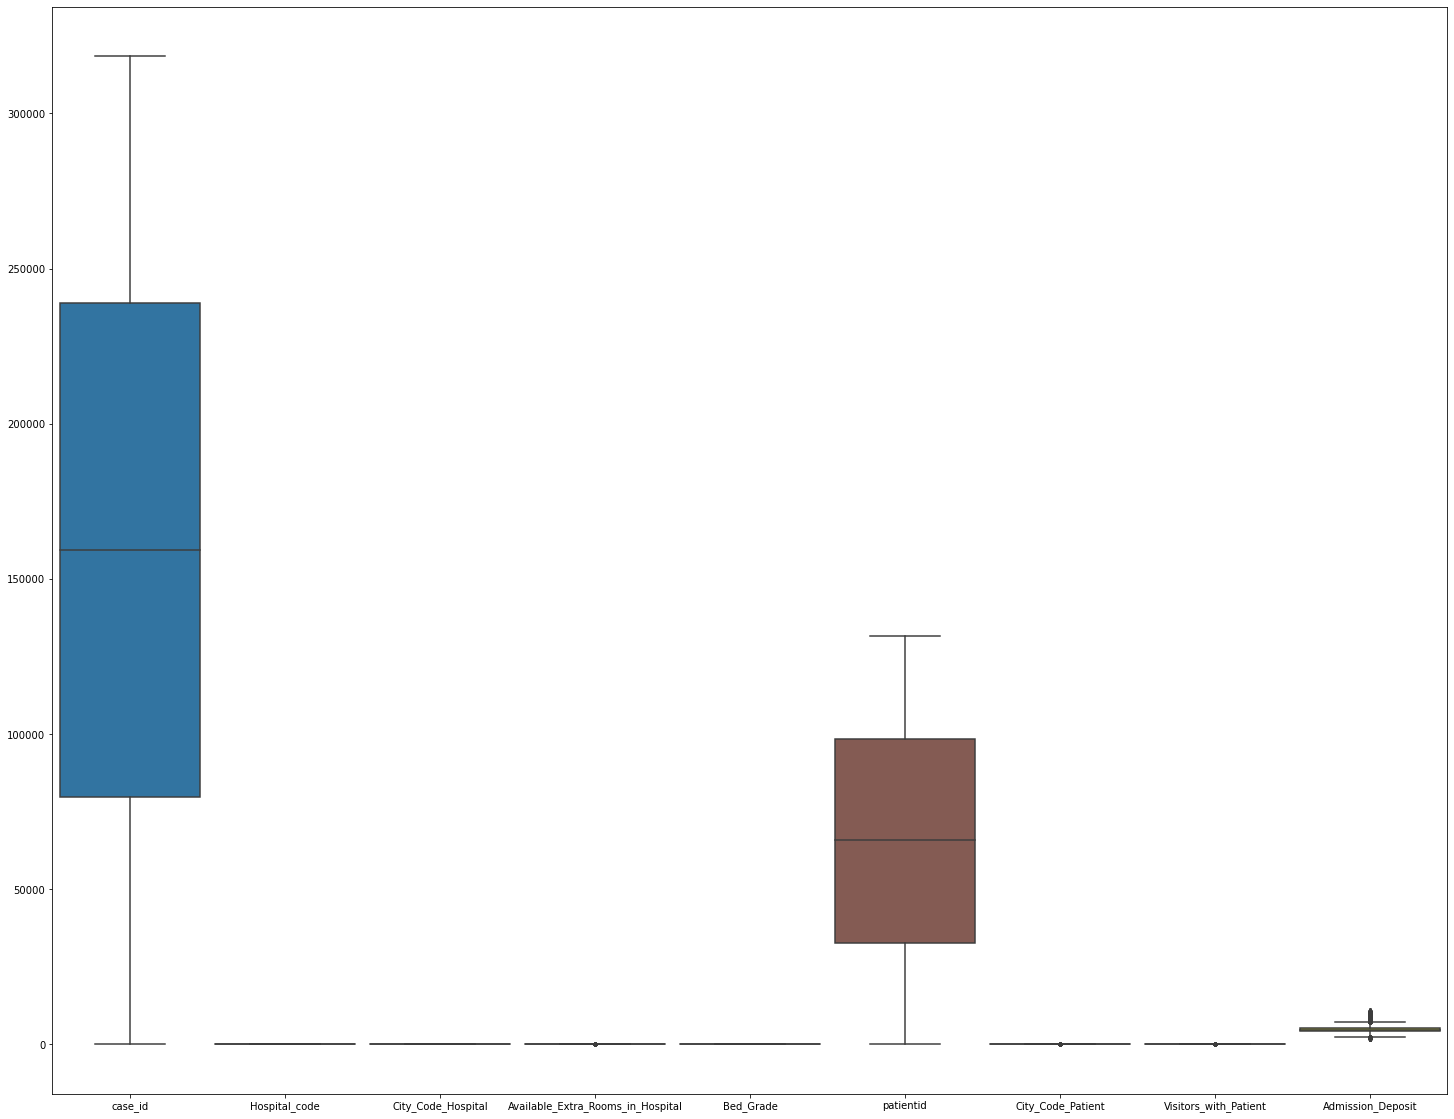

In [17]:
## chekcing the outliers
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(data=data1, width= 0.9,ax=ax,  fliersize=3)
plt.show()

There is no as such outliers in this dataset

## Feature Selection

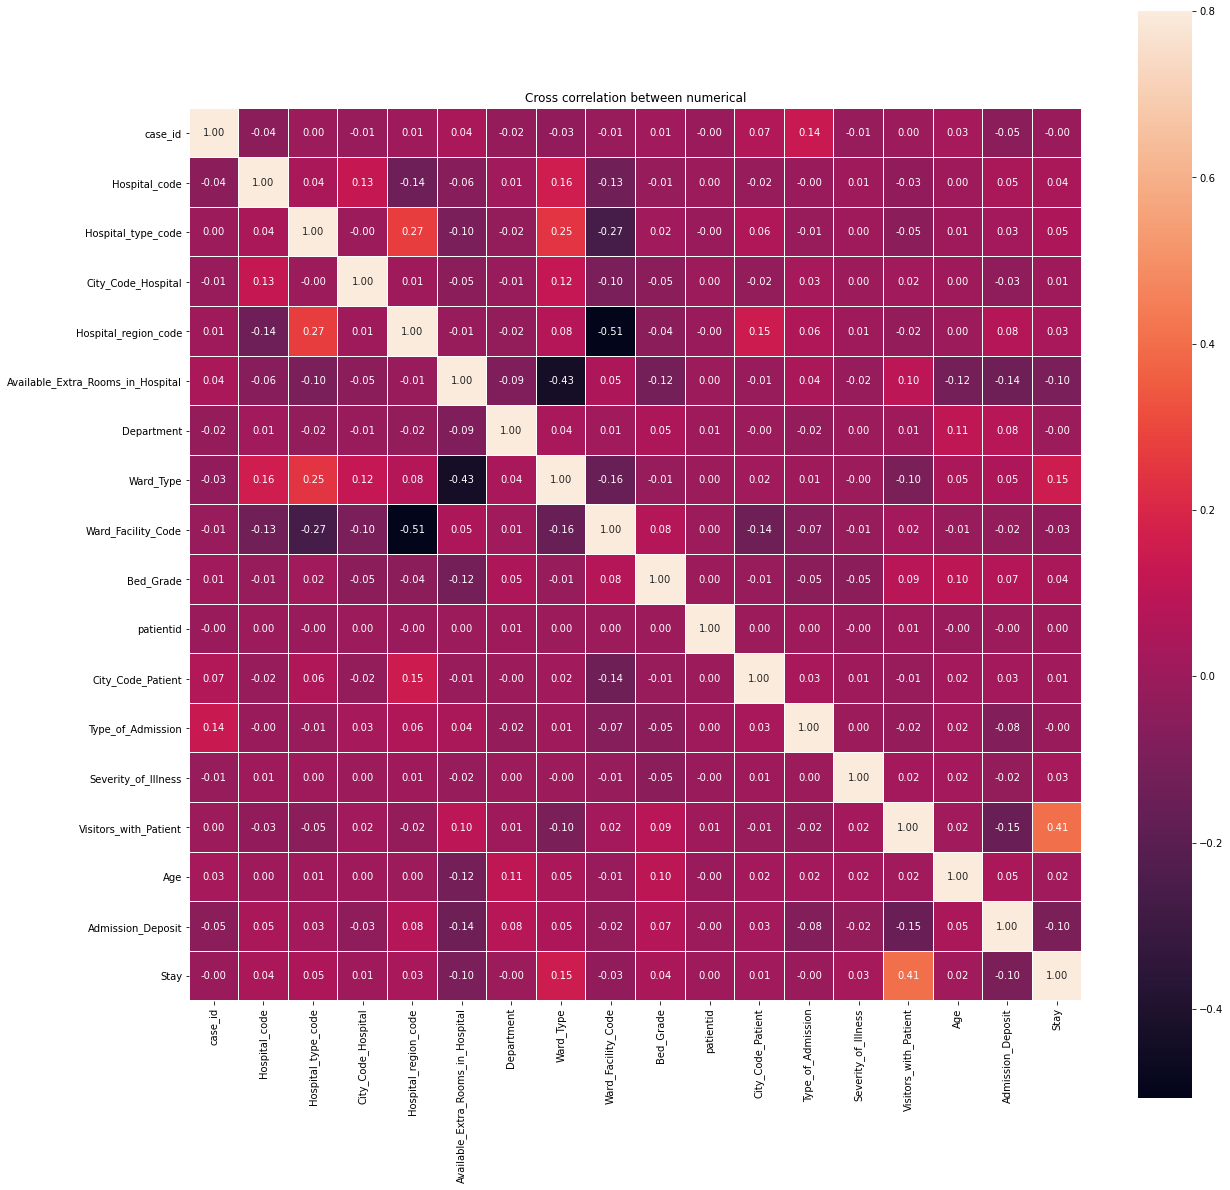

In [18]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()
## There are no highly correlated features in this dataset(threshold value=0.9),so we need not to drop any feature.

In [61]:
## checking the duplicate rows
data.duplicated().sum()

0

In [23]:
## checking the constant features
data.describe()
## the standard deviation of any feature is not 0 ,so the there are no constant feature in the dataset.

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,2.256841,4.771717,1.778098,3.197627,1.377603,1.888575,3.286913,2.625940,65747.579472,7.262506,1.674159,1.625924,3.284099,3.551162,4880.749392,3.028577
std,91925.276847,8.633755,1.535712,3.102535,0.752527,1.168171,0.799999,0.804655,1.688050,0.873019,37979.936440,4.712210,0.724078,0.768377,1.764061,2.143856,1086.776254,2.155395
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1800.000000,1.000000
25%,79610.250000,11.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,32847.000000,4.000000,1.000000,1.000000,2.000000,2.000000,4186.000000,1.000000
50%,159219.500000,19.000000,2.000000,5.000000,2.000000,3.000000,1.000000,2.000000,4.000000,3.000000,65724.500000,8.000000,2.000000,1.000000,3.000000,3.000000,4741.000000,2.000000
75%,238828.750000,26.000000,3.000000,7.000000,2.000000,4.000000,1.000000,2.000000,5.000000,3.000000,98470.000000,8.000000,2.000000,2.000000,4.000000,5.000000,5409.000000,4.000000
max,318438.000000,32.000000,7.000000,13.000000,3.000000,24.000000,5.000000,5.000000,5.000000,4.000000,131624.000000,38.000000,3.000000,3.000000,32.000000,10.000000,11008.000000,11.000000


In [32]:
## Checking Unique Features.
## case_id and patient_id is unique feature Id lets drop them before modelling.

In [19]:
data2 = data.drop(['case_id','patientid'],axis=1)
data2.head()


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,3,3,3,3,3,2,5,2,7,2,3,2,3,4911,5
1,2,3,5,3,2,3,3,5,2,7,1,3,2,3,5954,6
2,10,5,1,1,2,2,3,4,2,7,1,3,2,3,4745,3
3,26,2,2,2,2,3,2,3,2,7,1,3,2,3,7272,6
4,26,2,2,2,2,3,3,3,2,7,1,3,2,3,5558,6


## Model Creation


In [20]:
## Defining X and y and creating dependent and independent variables
X = data2.drop(columns = ['Stay']) ## independent variable
y = data['Stay'] ## Dependent or target variable"

In [37]:
X

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,8,3,3,3,3,3,2,5,2,7,2,3,2,3,4911
1,2,3,5,3,2,3,3,5,2,7,1,3,2,3,5954
2,10,5,1,1,2,2,3,4,2,7,1,3,2,3,4745
3,26,2,2,2,2,3,2,3,2,7,1,3,2,3,7272
4,26,2,2,2,2,3,3,3,2,7,1,3,2,3,5558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,1,3,3,1,5,4,23,2,1,3,1,4144
318434,24,1,1,1,2,2,1,4,4,8,3,1,4,8,6699
318435,7,1,4,1,3,1,2,5,4,10,2,2,3,5,4235
318436,11,2,2,2,3,2,1,3,3,8,1,2,5,7,3761


In [38]:
y

0         5
1         6
2         3
3         6
4         6
         ..
318433    2
318434    3
318435    2
318436    2
318437    5
Name: Stay, Length: 318438, dtype: int64

In [21]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({1: 87491, 2: 78139, 3: 55159, 4: 35018, 5: 23604, 6: 11743, 7: 10254, 8: 6683, 9: 4838, 10: 2765, 11: 2744})
Counter({5: 87491, 6: 87491, 3: 87491, 2: 87491, 4: 87491, 1: 87491, 7: 87491, 8: 87491, 9: 87491, 11: 87491, 10: 87491})


In [22]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X_sm)

In [23]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_sm, test_size= 0.25,random_state = 355)

### Model1 Creation: Logistic Regression model

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr')## object Creation

log_reg.fit(x_train,y_train)## fitting the model with training data

LogisticRegression(multi_class='ovr')

Let's see how our model performs on our test dataset

In [25]:
y_pred = log_reg.predict(x_test)

In [26]:
y_pred

array([10,  9,  8, ..., 11,  8,  5], dtype=int64)

In [27]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,4,5,6,7,8,9,10,11
Stay,,,,,,,,,,,
1,6076,5098,702,1032,4132,2865,151,167,138,140,1768
2,4463,6681,788,1248,4537,2065,145,169,225,150,1455
3,2777,3168,1419,3361,2699,2773,387,924,1261,730,2378
4,988,1210,1430,5493,1189,784,937,2600,2431,2675,2192
5,2321,3362,289,528,10093,2849,69,0,31,111,2088
6,2144,1644,417,710,3989,6576,226,284,381,549,4760
7,509,614,1155,3564,1061,489,1124,3517,2208,4300,3332
8,231,331,369,1351,532,179,331,13544,1940,2092,1038
9,197,236,439,2301,551,151,416,9488,4473,2659,924


In [28]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.2793296785965146

In [29]:
# Precison
Precision = precision_score(y_test,y_pred,average='weighted')
Precision

0.2646302545728089

In [30]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
Recall

0.2793296785965146

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.28      0.27      0.28     22269
           2       0.28      0.30      0.29     21926
           3       0.17      0.06      0.09     21877
           4       0.24      0.25      0.24     21929
           5       0.31      0.46      0.37     21741
           6       0.27      0.30      0.28     21680
           7       0.22      0.05      0.08     21873
           8       0.37      0.62      0.46     21938
           9       0.28      0.20      0.24     21835
          10       0.27      0.25      0.26     21784
          11       0.21      0.29      0.25     21749

    accuracy                           0.28    240601
   macro avg       0.26      0.28      0.26    240601
weighted avg       0.26      0.28      0.26    240601



Logistic regression Model is giving Accuracy of 27.9%

### Model2 Creation: Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_hat=dt.predict(x_test)

In [33]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
## Training score
y_train_predict=dt.predict(x_train)
cc_train=accuracy_score(y_train,y_train_predict)
cc_train

0.9997201440842338

In [34]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     65222
           2       1.00      1.00      1.00     65565
           3       1.00      1.00      1.00     65614
           4       1.00      1.00      1.00     65562
           5       1.00      1.00      1.00     65750
           6       1.00      1.00      1.00     65811
           7       1.00      1.00      1.00     65618
           8       1.00      1.00      1.00     65553
           9       1.00      1.00      1.00     65656
          10       1.00      1.00      1.00     65707
          11       1.00      1.00      1.00     65742

    accuracy                           1.00    721800
   macro avg       1.00      1.00      1.00    721800
weighted avg       1.00      1.00      1.00    721800



In [54]:
pd.crosstab(y_train,y_train_predict)

col_0,1,2,3,4,5,6,7,8,9,10,11
Stay,,,,,,,,,,,
1,65209,1,0,0,5,4,0,0,0,0,3
2,29,65526,1,0,7,2,0,0,0,0,0
3,18,12,65582,0,0,0,0,0,1,0,1
4,4,4,12,65539,0,0,2,0,0,0,1
5,7,35,5,3,65698,1,1,0,0,0,0
6,5,3,5,0,3,65795,0,0,0,0,0
7,0,0,1,1,2,2,65611,1,0,0,0
8,0,1,0,3,0,0,0,65549,0,0,0
9,0,0,0,1,1,0,0,1,65653,0,0


In [35]:
## test acc
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.5883267318090947

In [36]:
## test score
test_f1=f1_score(y_test,y_hat,average='weighted')
test_f1

0.5825651237518674

In [37]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.35      0.32      0.33     22269
           2       0.33      0.31      0.32     21926
           3       0.31      0.29      0.30     21877
           4       0.45      0.41      0.43     21929
           5       0.55      0.55      0.55     21741
           6       0.60      0.62      0.61     21680
           7       0.62      0.63      0.62     21873
           8       0.76      0.77      0.77     21938
           9       0.78      0.82      0.80     21835
          10       0.81      0.87      0.84     21784
          11       0.81      0.89      0.85     21749

    accuracy                           0.59    240601
   macro avg       0.58      0.59      0.58    240601
weighted avg       0.58      0.59      0.58    240601



Decision Tree Model is giving Accuracy of 58.3%

### Hyperparameters Tuning of DecisionTree

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [ ]:
tree_cv.best_params_

In [ ]:
tree_cv.best_score_

In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=1,min_samples_split=4,splitter='random')

In [ ]:
dt1.fit(x_train,y_train)

In [ ]:
y_hat1=dt1.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat1))

### Model3 Creation:Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
y_predict=rf_clf.predict(x_test)

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.39      0.44      0.41     22269
           2       0.38      0.38      0.38     21926
           3       0.39      0.28      0.33     21877
           4       0.55      0.50      0.52     21929
           5       0.61      0.65      0.63     21741
           6       0.67      0.68      0.67     21680
           7       0.72      0.70      0.71     21873
           8       0.85      0.85      0.85     21938
           9       0.83      0.90      0.86     21835
          10       0.89      0.93      0.91     21784
          11       0.87      0.93      0.90     21749

    accuracy                           0.66    240601
   macro avg       0.65      0.66      0.65    240601
weighted avg       0.65      0.66      0.65    240601



In [41]:
f_Score=f1_score(y_test,y_predict,average='weighted')
f_Score

0.6515181339105794

Random Forest Model is giving 65% Accuracy score

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 40, num=9)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)
y_predict=rf_clf2.predict(X_test)
f1_score=f1_score(y_test,y_predict)

In [ ]:
f1_score

## XG Boost Model Creation

In [22]:
## Installing XGB library
!pip3 install xgboost

In [23]:
import xgboost

In [24]:
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(x_train,y_train)
y_hat=xgb_c.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.38      0.53      0.44     22269
           2       0.39      0.41      0.40     21926
           3       0.35      0.15      0.21     21877
           4       0.39      0.37      0.38     21929
           5       0.46      0.56      0.50     21741
           6       0.42      0.43      0.43     21680
           7       0.41      0.31      0.35     21873
           8       0.64      0.51      0.57     21938
           9       0.52      0.67      0.58     21835
          10       0.52      0.55      0.53     21784
          11       0.56      0.58      0.57     21749

    accuracy                           0.46    240601
   macro avg       0.46      0.46      0.45    240601
weighted avg       0.46      0.46      0.45    240601



In [27]:
f_Score=f1_score(y_test,y_hat,average='weighted')
f_Score

0.45193819636198895

XGBoosting is giving model performance of 45%

Project Highligths:

Hospital admission data was analyzed to accurately predict the patient’s Length of Stay at the time of admit so that the hospitals can optimize resources and function better. Built 5 models in Python to predict the length of stay,

A supervised algorithm Logistic Regression which was classifying with an accuracy of 27.8%.

An ensemble method XGBoost which was predicting with an accuracy of 45.19%.

A Decision Tree Model which yields an accuracy of 58.3%.

A Random Forest Model which yields an accuracy of 65%.

### Future Insights:

1. Smart Staffing & Personnel Management - having a large voume of quality data helps health care professionals in allocating resources efficiently. Healthcare professionals can analyze the outcomes of checkups among individuals in various demographic groups and determine what factors prevent individuals from seeking tratement.

2. Advanced Risk & Disease Management - Healthcare institutions can offer accurate, preventive care. Effectively decreasing hospital admissions by digging into insights such as drug type, conditions and the duration of patient visits, amonong many others.

3. Real-time Alerting - Clinincal Decision Support apllications in hospital analyzes patient evidence on the spot, delivering recommendations to health professionals when they make prescriptive choces. However, to prevent unnecessary in-house procedure, physicians prefer people to stay away from hospitals.

4. Enhancing Patient Engagement - Every step they take, heart rates, sleeping habits, can be tracked for potential patients (who use smart wearables). All this information can be correlated with other trackable data to identify potential health risks.

## Conclusion:
In this project, different variables were analyzed that correlate eith Length of Stay by using patient-level and hospital-level date.
    
By predicting a patient's length of stay at the time of admission helps hospital to allocate resources more efficiently and manage their patients more effectively. Identifying factors that associate with length of Stay (LOS) to predict and manage the number of days patients stay, could help hospitals in managing resources and in the developement of new treatement plans. Effective use of hospital resources and reducing the length of stay can reduce overall national medical expenses.